In [6]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import and display the dataset
df = pd.read_csv("data/exploratory_sorted_data.csv")
df

,Unnamed: 0,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed,application_rate,size_classification
0,304,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,251,205,17403.0,27.71,67.5,1.3,6.8,0.6,...,4.17,11.3,65.8,3.3,873.0,4.36,0.90,0.90,0.287514,large
1,324,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,336,196,16814.0,30.51,27.8,6.9,5.7,8.2,...,3.77,11.9,37.7,1.1,1322.0,4.16,0.88,0.88,0.254160,large
2,33,J.H.S. 054 BOOKER T. WASHINGTON,257,150,17359.0,25.47,11.0,8.6,14.7,8.0,...,3.52,11.5,23.8,1.1,852.0,4.14,0.89,0.88,0.301643,large
3,241,M.S. 51 WILLIAM ALEXANDER,280,122,16145.0,25.36,16.4,7.6,20.4,4.7,...,3.31,17.7,28.7,2.2,1136.0,4.05,0.83,0.83,0.246479,large
4,22,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,163,113,15853.0,31.83,55.1,2.0,6.5,6.5,...,4.03,16.4,38.3,1.4,554.0,4.34,0.88,0.89,0.294224,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,441,EAGLE ACADEMY FOR YOUNG MEN III,0,0,22617.0,17.25,1.3,88.5,3.2,5.1,...,3.17,25.4,71.9,0.8,531.0,2.57,0.34,0.20,0.000000,small
590,211,EAST BRONX ACADEMY FOR THE FUTURE,14,0,22509.0,16.92,1.8,25.8,70.0,1.5,...,2.83,28.9,91.8,15.1,671.0,3.57,0.28,0.18,0.020864,large
591,443,COMMUNITY VOICES MIDDLE SCHOOL,9,0,18845.0,20.26,1.7,86.4,9.6,1.7,...,3.73,26.5,71.2,5.6,302.0,3.12,0.32,0.19,0.029801,small
592,210,BRONX LATIN,0,0,19742.0,18.16,1.4,19.0,77.7,0.7,...,2.57,25.6,94.3,14.5,579.0,3.48,0.31,0.22,0.000000,large


# Constructing a Clustering Model to Determine School Success Metrics

In [5]:
# Create list of features which measure student success metrics
success_metrics = ["applications", "acceptances", "per_pupil_spending", "avg_class_size",
                  "school_size", "student_achievement", "reading_scores_exceed", "math_scores_exceed"]

# Separate success metric features from the rest of the dataset
X = df[success_metrics]
# Standardize the success metric features
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
# Display shape of scaled features to determine if properly standardized
X_scale.shape

(594, 8)

## Determining Optimal Number of Clusters Using Elbow Method

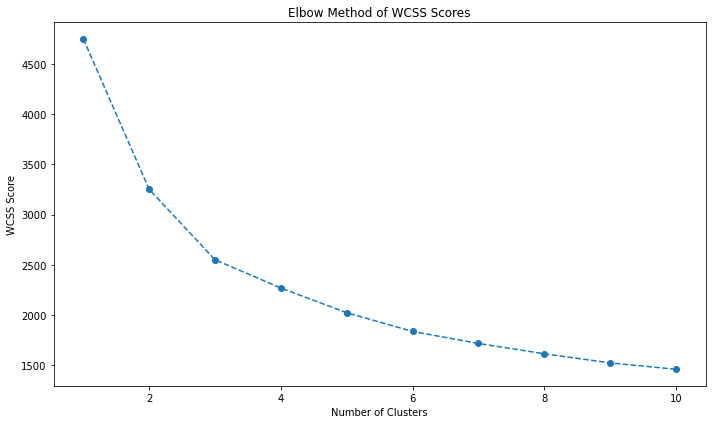

In [8]:
# Determine optimal number of clusters using Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method WCSS scores
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss, marker = "o", linestyle = "--")
plt.title("Elbow Method of WCSS Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Score")
plt.tight_layout()
plt.show();

From the WCSS scores, it seems as if the **optimal number of clusters** to build a KMeans model on is **3 clusters**. This is because after 3 clusters, the WCSS scores decreases at a much slower rate. Therefore I decided to train my KMeans model with these 3 clusters to segment the schools. I first trained the KMeans clustering model before analyzing the centroids in order to **determine which school features are the most significant in predicting educational outcomes**.

## Training the KMeans Model on Educational Features

In [10]:
# Train KMeans clustering model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X_scale)
# Add cluster labels to the DataFame
df["cluster"] = clusters

# Analyze the centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                        columns = success_metrics)
# Display the KMeans centroids
centroids

,applications,acceptances,per_pupil_spending,avg_class_size,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
0,42.100418,4.627615,19332.309623,23.992218,748.056485,3.622594,0.599749,0.575272
1,207.744681,64.574468,16949.659574,26.728936,1269.744681,3.778511,0.699362,0.682979
2,17.931818,1.038961,22196.224026,19.640942,425.556818,3.175195,0.325617,0.251104


## Analyzing the KMeans Centroids

Comparing the three centroids, I noticed **key differences** between each of the three clusters:

- **Cluster 0:** Cluster 0 schools are characterized as a **moderate number** of both **acceptances** and **applications**, with **average class size* around **25 students** and a **relatively high** **per pupil spending**. Additionally these schools have **student achievement scores** of around **3.30** as well as around **36%** of students **exceeding reading expectations** and **30%** of students **exceeding math expectations**.


- **Cluster 1:** Cluster 1 schools are characterized as having the **highest number** of both **acceptances** and **applications**, as well as having the **largest class sizes** and **highest per pupil spending**. Additionally these schools have the **highest student achievement scores** and the **highest percentage of students exceeding both reading and math expectations**.


- **Cluster 2:** Cluster 2 schools are characterized as having the **lowest number** of **acceptances, applications, smallest class sizes,** and **least per pupil spending**. Additionally these schools have the **lowest student achievement scores** and the **lowest percentage of students exceeding both reading and math expectations**.

However in order to determine which school features contributed the most to these objective measures of success, I analyzed the **spread between centroids** for each educational feature across the clsuters.

Essentially features with a **wider spread between centroids** are more likely to be **significant** in **differentiating clusters**.

## Calculating Spread Between KMeans Centroids

In [11]:
# Calculate spread between centroids for each educational feature
spread = centroids.max() - centroids.min()
# Create a spread DataFrame for the featuresF
spread_df = spread.reset_index()
spread_df.columns = ["feature", "spread"]
# Sort the spread DataFrame according to descending values of spread
spread_df.sort_values(by = "spread", ascending = False)

,feature,spread
2,per_pupil_spending,5246.564452
4,school_size,844.187863
0,applications,189.812863
1,acceptances,63.535507
3,avg_class_size,7.087995
5,student_achievement,0.603316
7,math_scores_exceed,0.431875
6,reading_scores_exceed,0.373745


From analyzing the DataFrame of spread values, it is clear that the feature that explains the difference between centroids the most is **per pupil spending**. This definitely makes sense as increased student spending would contribute significantly to student success. However a **suprising observation** is that **school size** and **average class size** are so much less meaningful in regards to student success metrics than just overall spending.